In [1]:
import sys
from pathlib import Path


import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics import classification_report


from spnc import spnc_anisotropy
import spnc_ml as ml

In [2]:
def NRMSE(Y,Y_pred):
    var = np.var(Y)
    return np.sqrt(np.square(Y_pred-Y).mean()/var)

def NRMSE_list(y,y_pred):
    Y = np.array(y)
    Y_pred = np.array(y_pred)
    return(NRMSE(Y,Y_pred))

noise-free, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in fast: 0.49999977789842975
len(K_s): 60000
train_samples: 60000
restarted
noise-free output
Seed Training: 1234
p1 in fast: 0.49999977789842975
len(K_s): 30000
train_samples: 60000
restarted
noise-free output
Spacer NRMSE:0
0.004620522927707696 0.6142236293701125


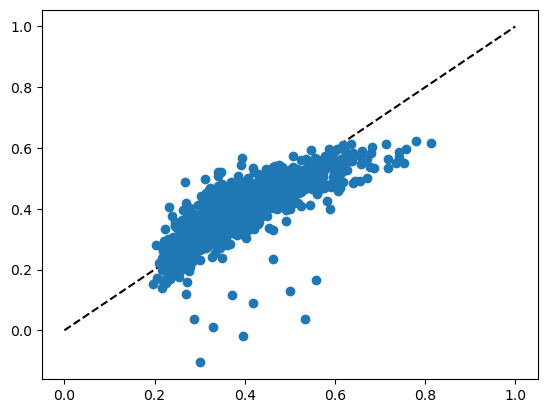

In [3]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in train, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in fast: 0.49999977789842975
len(K_s): 60000
train_samples: 60000
restarted
noisy output
Seed Training: 1234
p1 in fast: 0.49999977789842975
len(K_s): 30000
train_samples: 60000
restarted
noise-free output
Spacer NRMSE:0
0.007254599457106204 0.7696400773814546


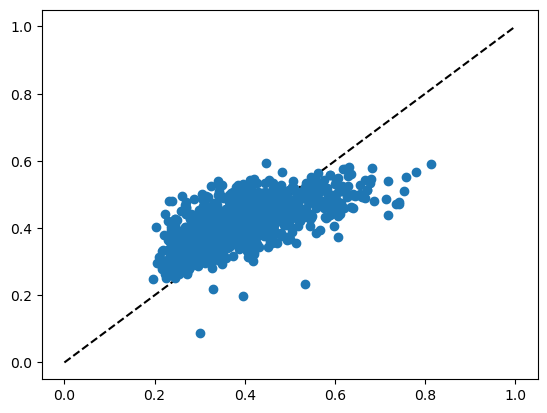

In [4]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'train',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in test, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in fast: 0.49999977789842975
len(K_s): 60000
train_samples: 60000
restarted
noise-free output
Seed Training: 1234
p1 in fast: 0.49999977789842975
len(K_s): 30000
train_samples: 60000
restarted
noisy output
Spacer NRMSE:0
426.1664239111295 186.53939770587223


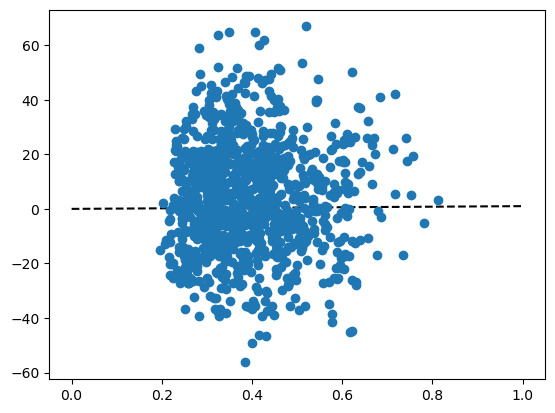

In [5]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'test',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in both, primep1 = none, restart = true

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in fast: 0.49999977789842975
len(K_s): 60000
train_samples: 60000
restarted
noisy output
Seed Training: 1234
p1 in fast: 0.49999977789842975
len(K_s): 30000
train_samples: 60000
restarted
noisy output
Spacer NRMSE:0
0.007350504427488697 0.7747106509521734


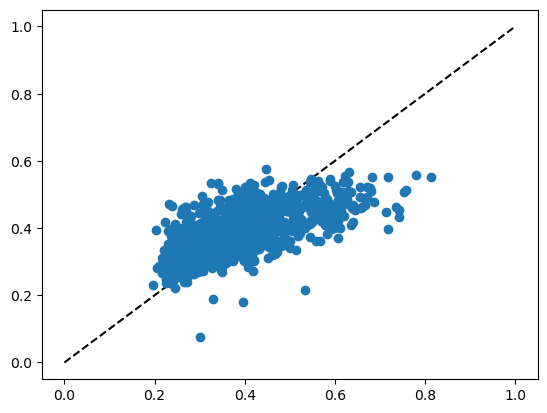

In [6]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
# transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
# (y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
(y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

### test the slow version 

noise-free

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 60000
train_samples: 2000
restarted
noise-free output
Seed Training: 1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 30000
train_samples: 2000
restarted
noise-free output
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935


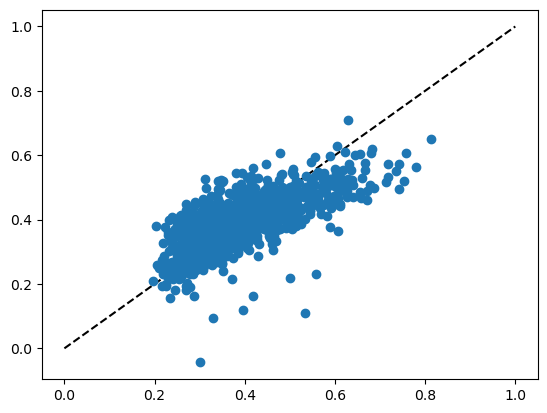

In [7]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain,
    'test_sample': Ntest
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in train

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 60000
train_samples: 60000
restarted
noisy output
Seed Training: 1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 30000
train_samples: 60000
restarted
noise-free output
Spacer NRMSE:0
0.007323201640696838 0.7732705159194537


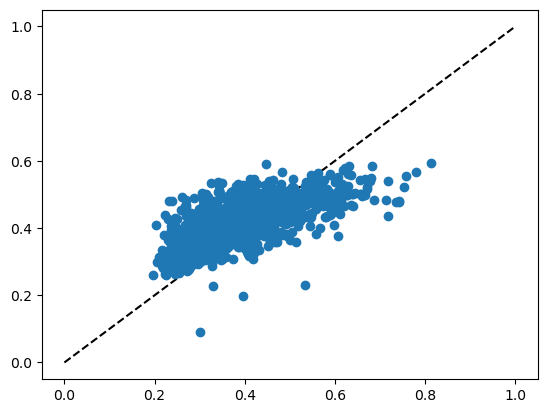

In [8]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'train',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in test

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 60000
train_samples: 60000
restarted
noise-free output
Seed Training: 1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 30000
train_samples: 60000
restarted
noisy output
Spacer NRMSE:0
0.055978746329244024 2.137925360825142


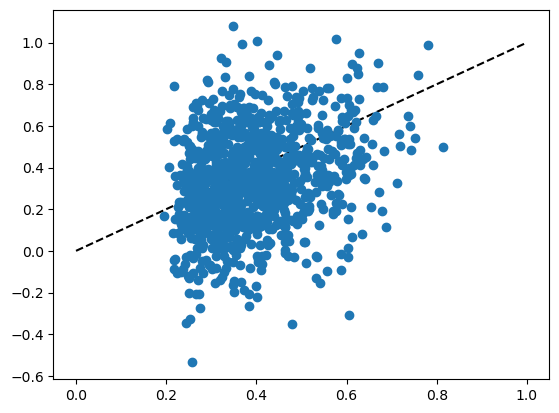

In [9]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'test',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

add noise in both

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 60000
train_samples: 60000
restarted
noisy output
Seed Training: 1234
p1 in slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
len(K_s): 30000
train_samples: 60000
restarted
noisy output
Spacer NRMSE:0
0.007080842567105186 0.7603672874015774


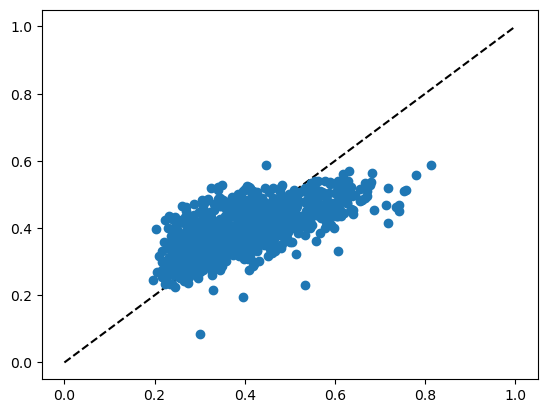

In [10]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

test the specific noise (mean = -0.000047, std = 0.000057)

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: -4.7e-05
noisy training output
restarted
Training data size:  60000
Training data shape:  (2000, 30)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: -4.7e-05
noisy testing output
restarted
Spacer NRMSE:0
0.006803588868494224 0.7453323748805507


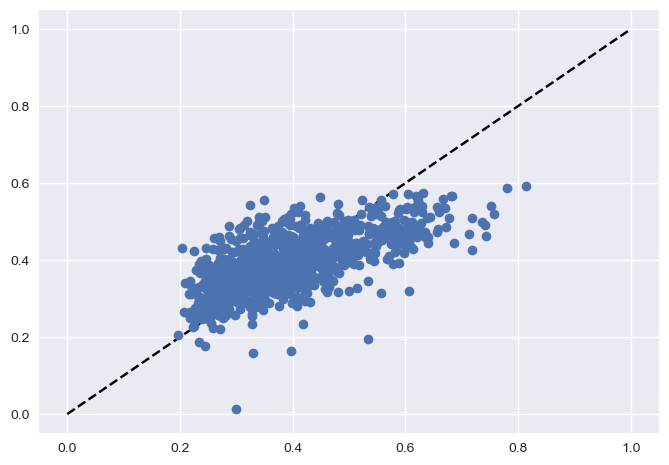

In [19]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':-0.000047,
    'noise_std':0.000057,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
# transformf = spn.gen_signal_fast_delayed_feedback

# run
(y_test_s,y_pred_s) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)
# run
# (y_test_f,y_pred_f) = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_outputs=True)

Find out the relationship between noise and performance (baseline is NRMSE=0.6142236293701125, noise-free, fast)

Firstly, make a std loop (0.0001 to 0.001), both

std loop:   0%|          | 0/10 [00:00<?, ?it/s]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.007066724823854058 0.7596089012307252


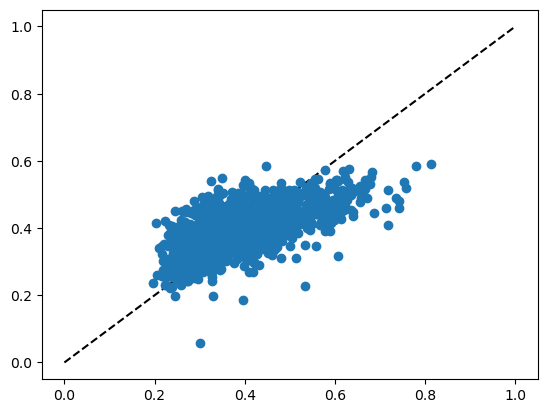

std loop:  10%|█         | 1/10 [00:37<05:38, 37.63s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.0072398521942519225 0.7688574112522686


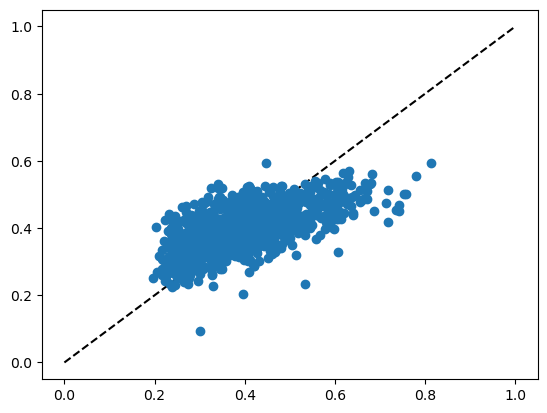

std loop:  20%|██        | 2/10 [01:15<05:02, 37.81s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.007377672509137436 0.7761410282850133


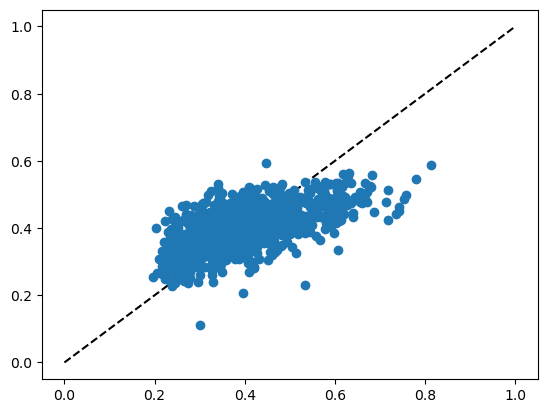

std loop:  30%|███       | 3/10 [01:54<04:28, 38.29s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.007485542219160795 0.7817944574088919


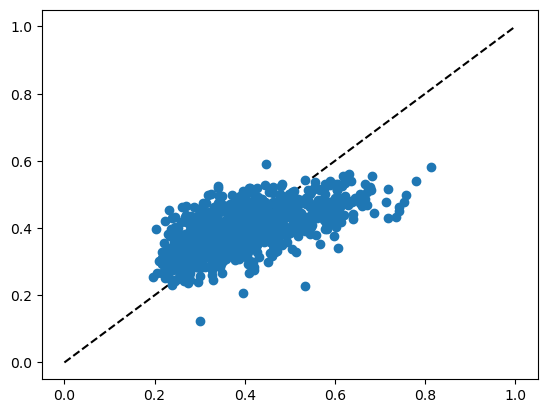

std loop:  40%|████      | 4/10 [02:32<03:50, 38.38s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.00758587417417754 0.787016382090817


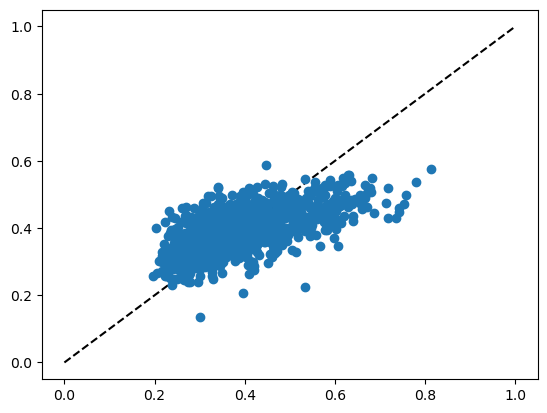

std loop:  50%|█████     | 5/10 [03:11<03:11, 38.33s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.007688952151570667 0.7923453876965677


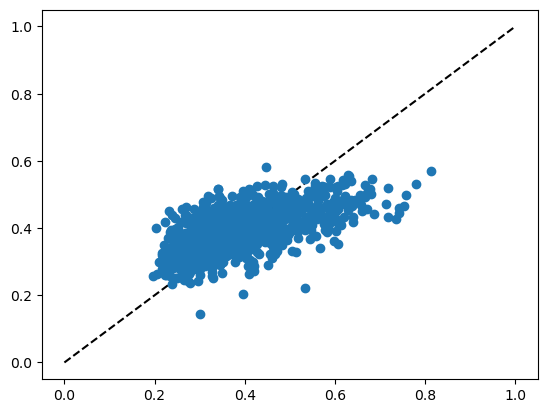

std loop:  60%|██████    | 6/10 [03:49<02:32, 38.17s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.007789167938740334 0.7974922822312548


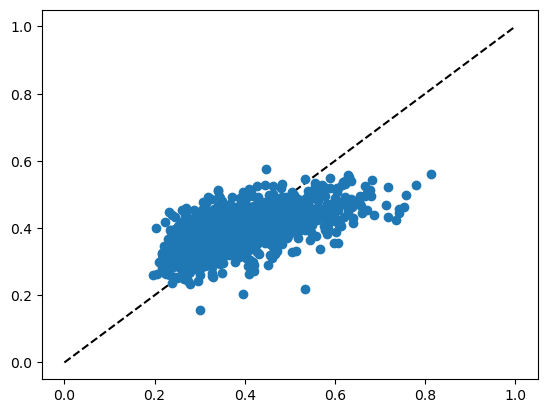

std loop:  70%|███████   | 7/10 [04:27<01:54, 38.11s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.007891141466246867 0.8026955764310247


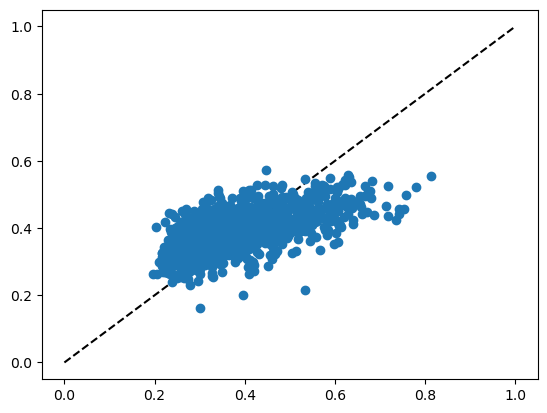

std loop:  80%|████████  | 8/10 [05:04<01:16, 38.06s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.007993440865235096 0.8078818257532734


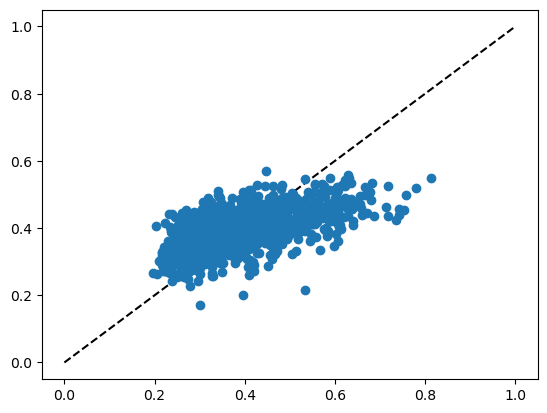

std loop:  90%|█████████ | 9/10 [05:43<00:38, 38.32s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.008093477798066333 0.8129213784541068


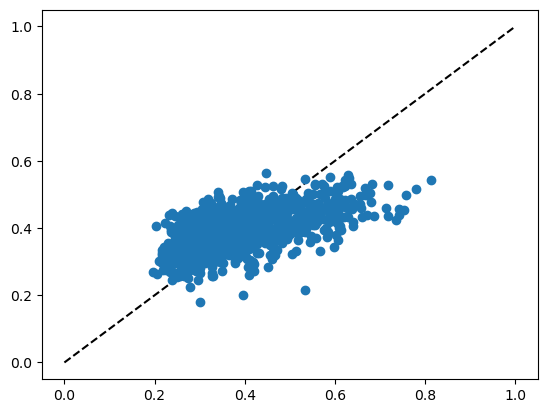

std loop: 100%|██████████| 10/10 [06:21<00:00, 38.17s/it]


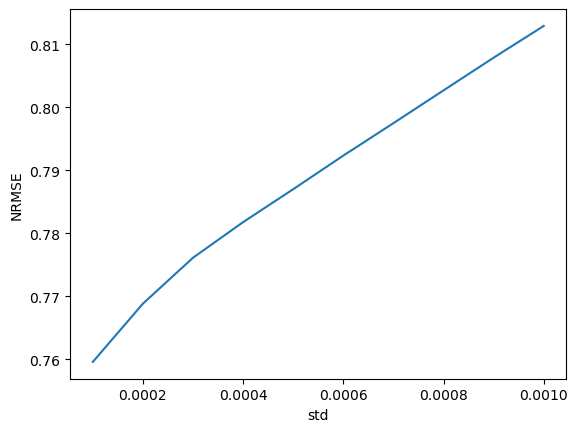

In [5]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

transforms = spn.gen_signal_slow_delayed_feedback

# std loop
std_list = np.linspace(0.0001,0.001,10)

NRMSE_list_s = []

for std in tqdm(std_list,desc='std loop'):
    params['noise_std'] = std
    nrmse = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)
    NRMSE_list_s.append(nrmse)

# plot
plt.plot(std_list,NRMSE_list_s)
plt.xlabel('std')
plt.ylabel('NRMSE')
plt.show()



Looks good. Have a look on slight noise.

std loop:   0%|          | 0/10 [00:00<?, ?it/s]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.0060133040171223085 0.7007087418471875


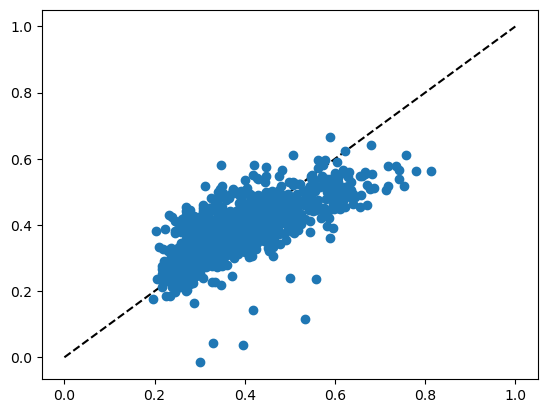

std loop:  10%|█         | 1/10 [00:38<05:45, 38.34s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.006063290621788605 0.7036150943076812


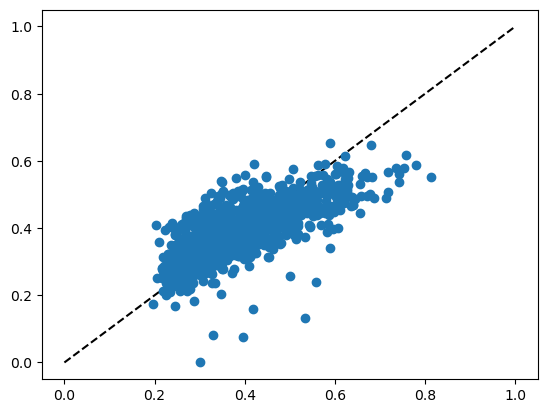

std loop:  20%|██        | 2/10 [01:16<05:07, 38.41s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.006257143688564671 0.7147744485836168


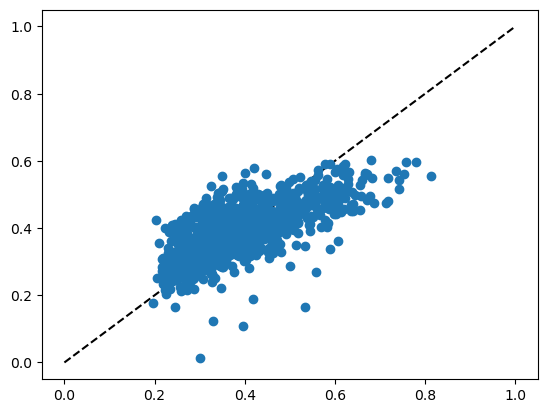

std loop:  30%|███       | 3/10 [01:54<04:28, 38.31s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.006469316699888267 0.7267920382995656


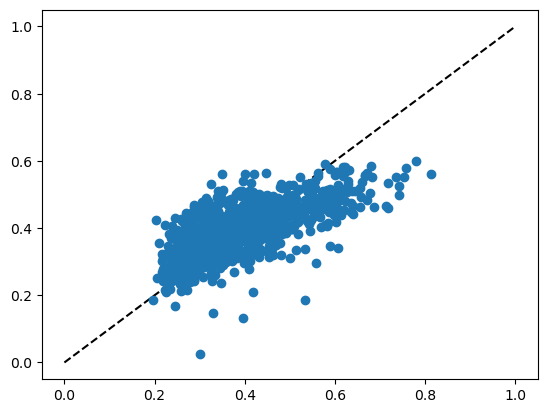

std loop:  40%|████      | 4/10 [02:33<03:49, 38.20s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.006625630921580143 0.7355201501442226


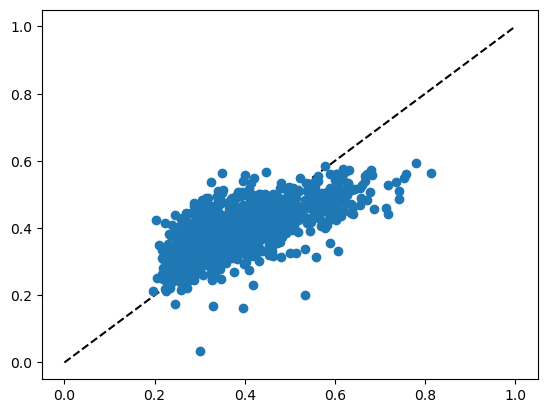

std loop:  50%|█████     | 5/10 [03:10<03:10, 38.09s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.006744152240826807 0.7420695954329806


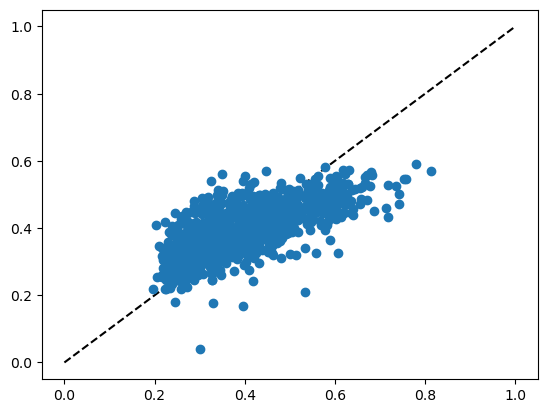

std loop:  60%|██████    | 6/10 [03:48<02:31, 37.98s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.006858766791669809 0.748348639219502


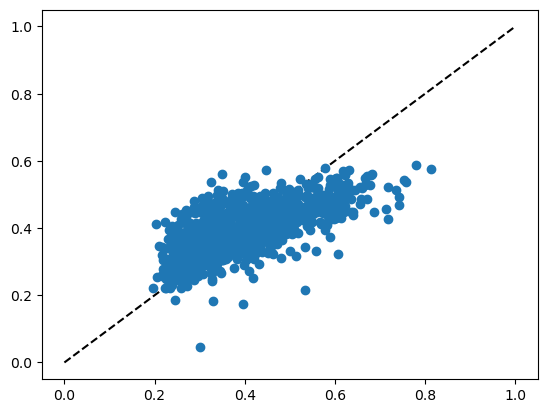

std loop:  70%|███████   | 7/10 [04:26<01:53, 37.98s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.0069397555543632295 0.7527539474536286


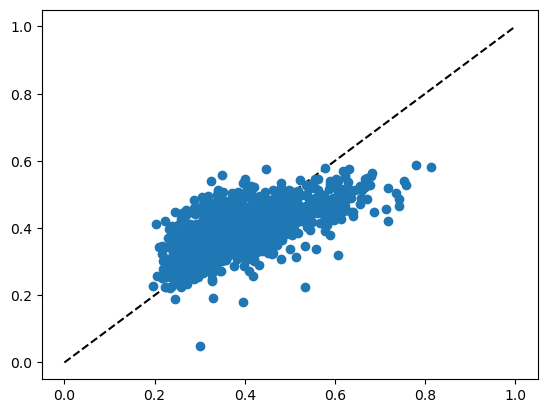

std loop:  80%|████████  | 8/10 [05:04<01:16, 38.08s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.007023713590684137 0.7572937140751873


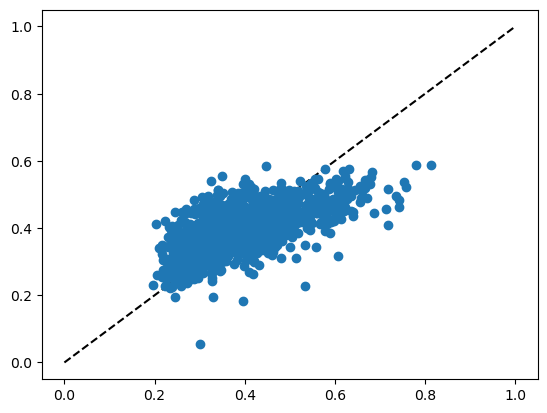

std loop:  90%|█████████ | 9/10 [05:43<00:38, 38.11s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.007066724823854058 0.7596089012307252


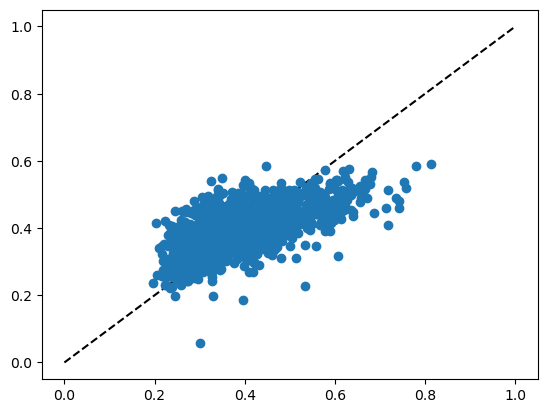

std loop: 100%|██████████| 10/10 [06:20<00:00, 38.09s/it]


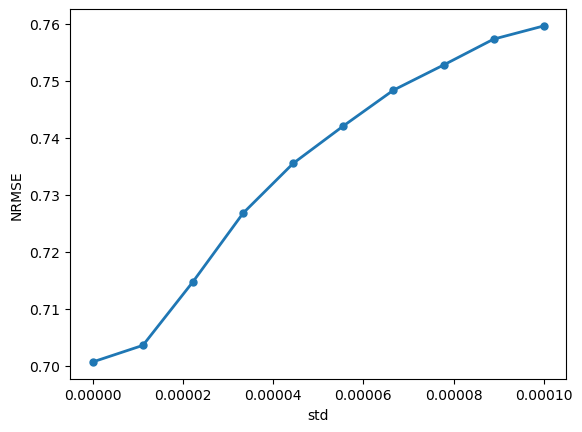

In [7]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

transforms = spn.gen_signal_slow_delayed_feedback

# std loop
std_list = np.linspace(0.000,0.0001,10)

NRMSE_list_s = []

for std in tqdm(std_list,desc='std loop'):
    params['noise_std'] = std
    nrmse = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)
    NRMSE_list_s.append(nrmse)

# plot
plt.plot(std_list,NRMSE_list_s, 'o-', markersize=5, linewidth=2)    
plt.xlabel('std')
plt.ylabel('NRMSE')
plt.show()


run with mean = 0

std loop:   0%|          | 0/10 [00:00<?, ?it/s]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.005848129223673703 0.6910181194108935


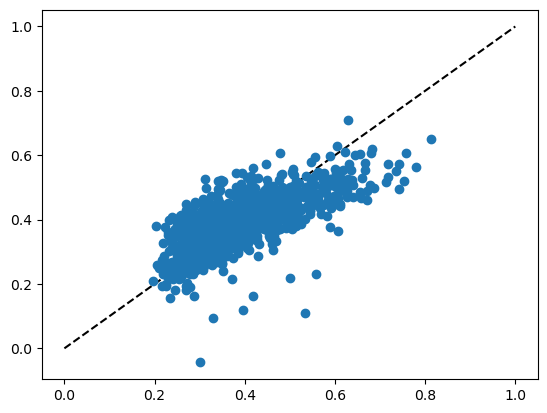

std loop:  10%|█         | 1/10 [00:39<05:53, 39.33s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.005986089453393221 0.699121336035909


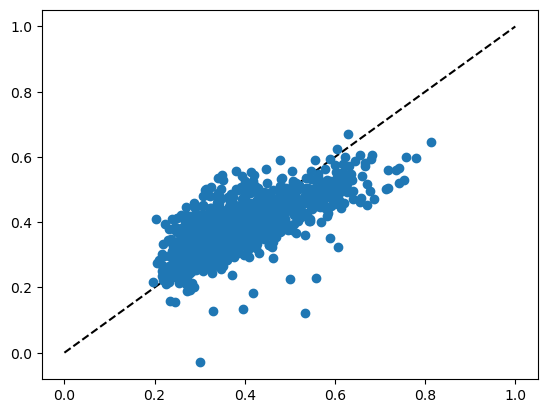

std loop:  20%|██        | 2/10 [01:17<05:10, 38.79s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.006239357404445883 0.7137578322644224


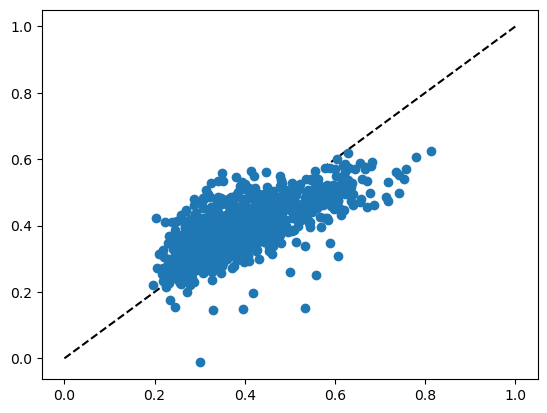

std loop:  30%|███       | 3/10 [01:56<04:30, 38.60s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.006444223463018887 0.7253811254471645


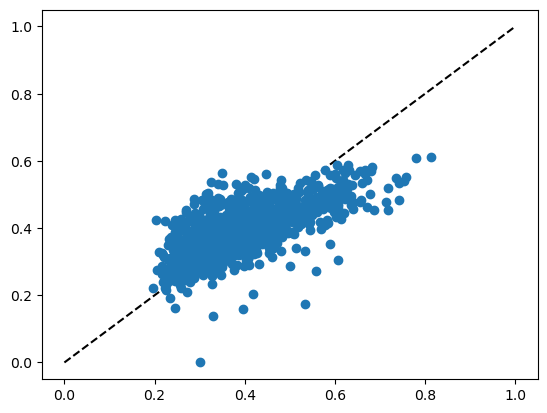

std loop:  40%|████      | 4/10 [02:36<03:55, 39.30s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.0066283578994107304 0.7356714973010586


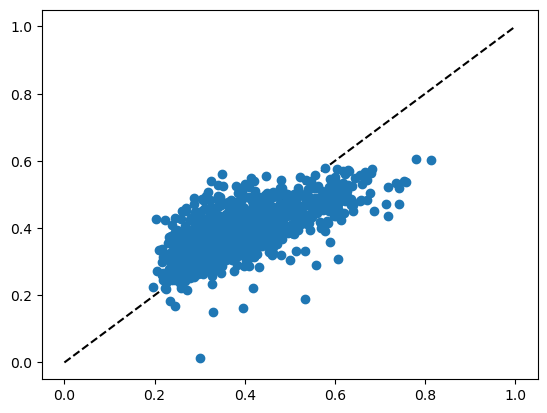

std loop:  50%|█████     | 5/10 [03:19<03:22, 40.48s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.0067573205012884064 0.7427937042655405


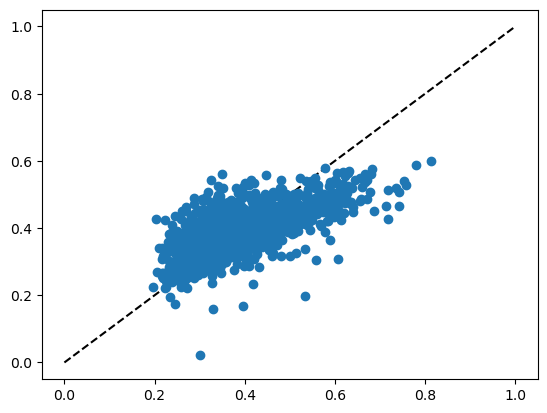

std loop:  60%|██████    | 6/10 [04:02<02:45, 41.38s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.006861262235405972 0.7484847636971875


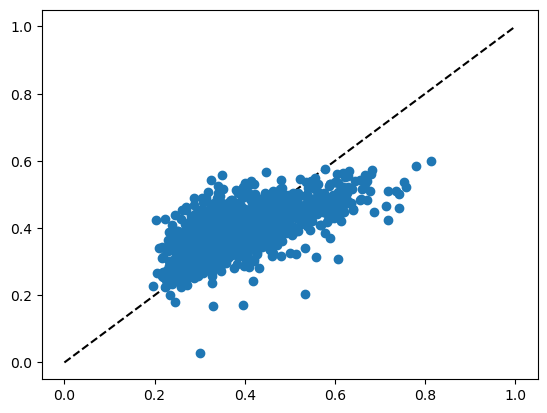

std loop:  70%|███████   | 7/10 [04:44<02:05, 41.85s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.006959886182232739 0.7538449395101398


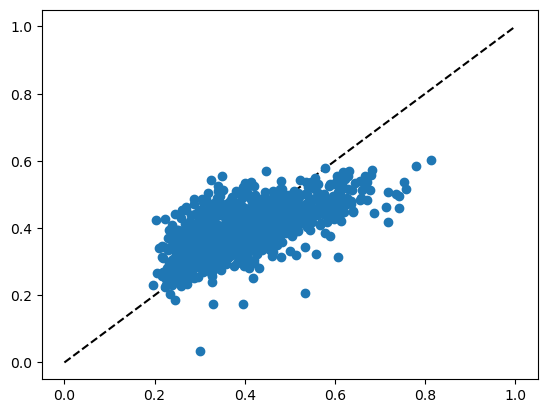

std loop:  80%|████████  | 8/10 [05:32<01:27, 43.77s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.00702477819606781 0.7573511045429702


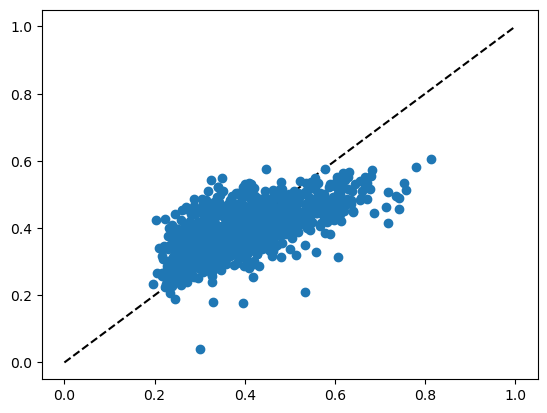

std loop:  90%|█████████ | 9/10 [06:29<00:47, 47.92s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  30
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0
noisy testing output
restarted
Spacer NRMSE:0
0.007099169285035396 0.7613506471932836


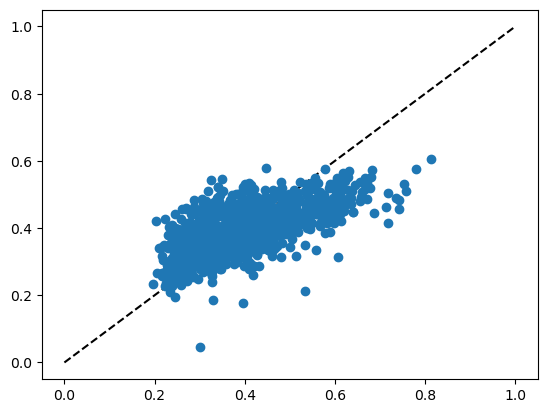

std loop: 100%|██████████| 10/10 [07:12<00:00, 43.23s/it]


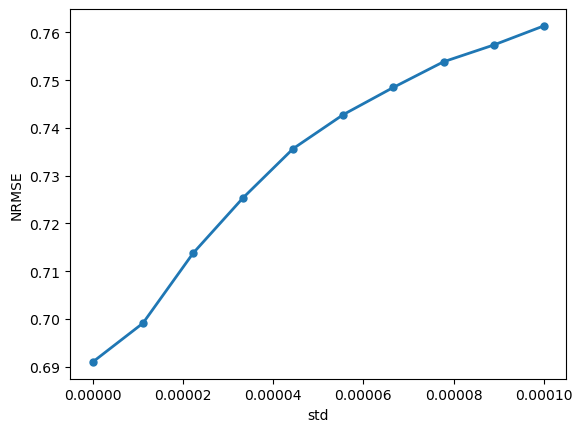

In [8]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 30
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

# Params
params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0000,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

transforms = spn.gen_signal_slow_delayed_feedback

# std loop
std_list = np.linspace(0.000,0.0001,10)

NRMSE_list_s = []

for std in tqdm(std_list,desc='std loop'):
    params['noise_std'] = std
    nrmse = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)
    NRMSE_list_s.append(nrmse)

# plot
plt.plot(std_list,NRMSE_list_s, 'o-', markersize=5, linewidth=2)    
plt.xlabel('std')
plt.ylabel('NRMSE')
plt.show()

didn't meet our expectation, maybe the problem of parameters. Let us use m0=1e-2

std loop:   0%|          | 0/10 [00:00<?, ?it/s]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005101147698855559 0.6453791106011095


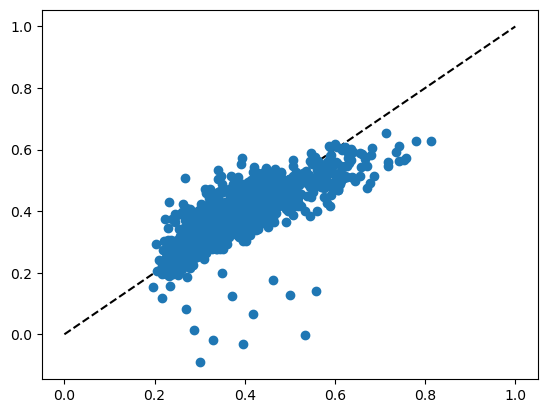

std loop:  10%|█         | 1/10 [00:53<08:00, 53.34s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.0051338612841039435 0.6474452068109743


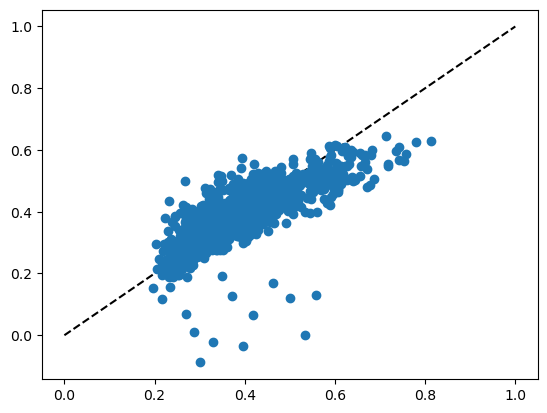

std loop:  20%|██        | 2/10 [01:47<07:09, 53.67s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005177136762440018 0.6501682745072244


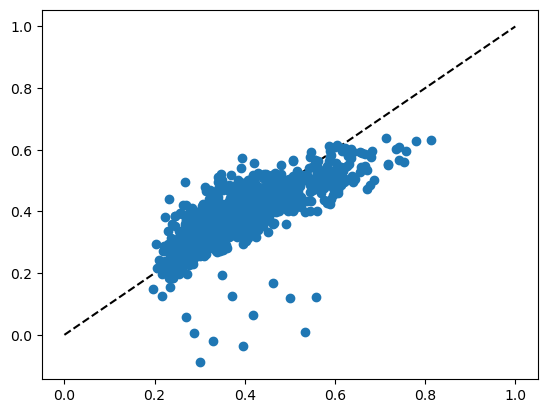

std loop:  30%|███       | 3/10 [02:44<06:28, 55.44s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005196247618801182 0.6513671830490129


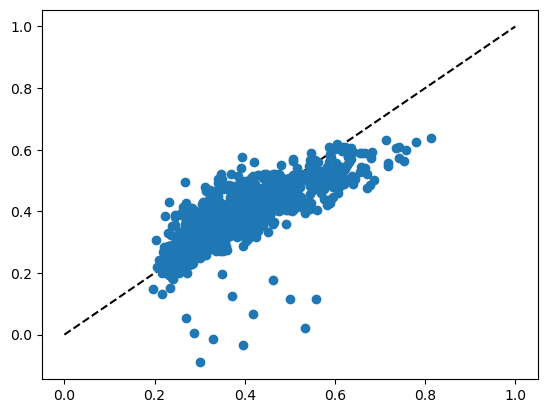

std loop:  40%|████      | 4/10 [03:44<05:42, 57.09s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005235262834828832 0.6538079546063861


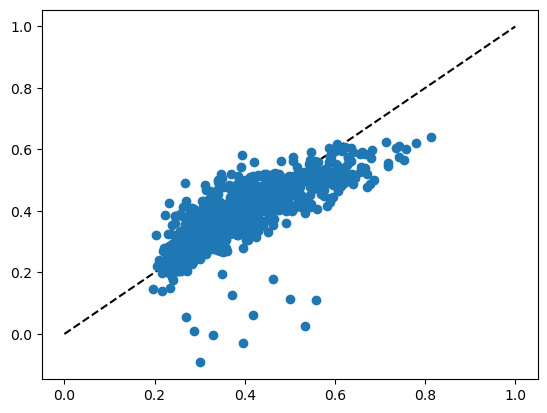

std loop:  50%|█████     | 5/10 [04:38<04:40, 56.07s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005103627878556371 0.6455359833042066


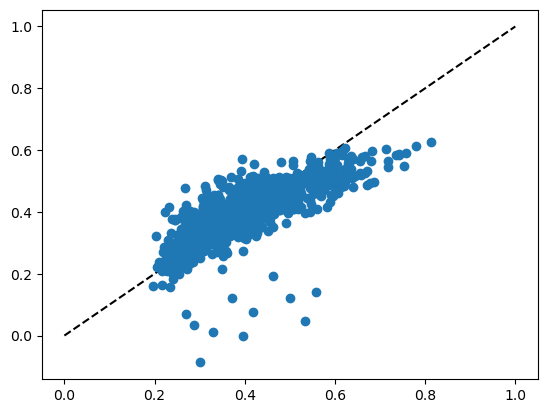

std loop:  60%|██████    | 6/10 [05:32<03:41, 55.29s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.0051374203263371025 0.6476695881766755


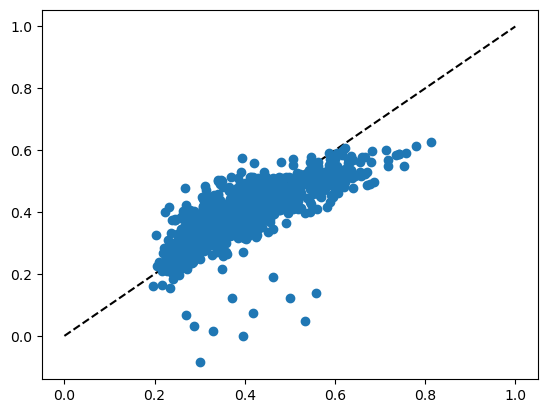

std loop:  70%|███████   | 7/10 [06:25<02:43, 54.61s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005159777124839721 0.6490773082565978


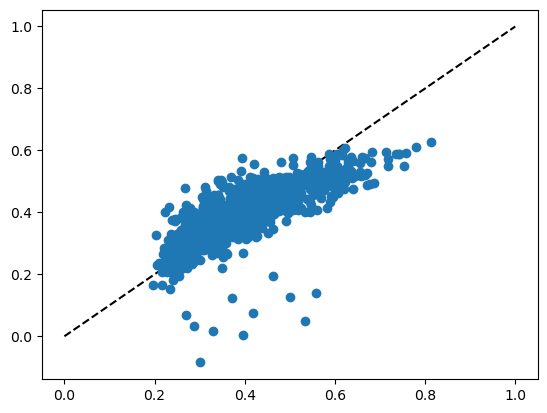

std loop:  80%|████████  | 8/10 [07:19<01:48, 54.49s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.0051856654597166015 0.6507035903403268


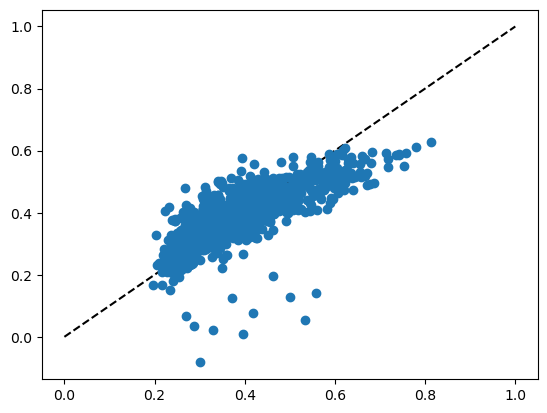

std loop:  90%|█████████ | 9/10 [08:25<00:57, 57.99s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005205367695124754 0.651938548633665


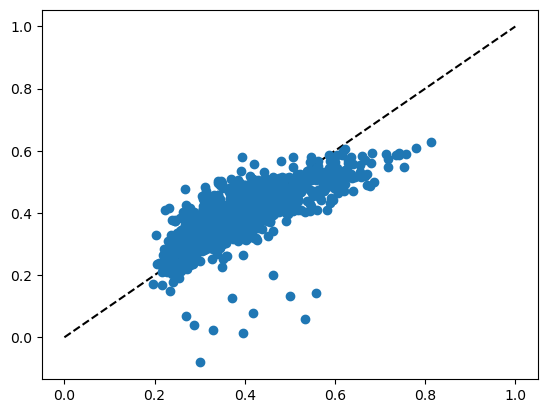

std loop: 100%|██████████| 10/10 [09:21<00:00, 56.18s/it]


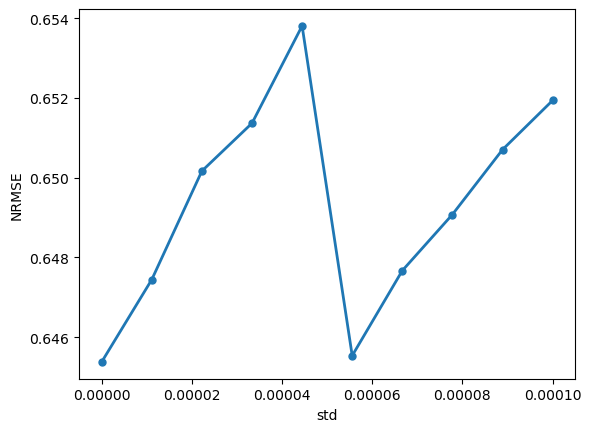

In [ ]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

transforms = spn.gen_signal_slow_delayed_feedback

# std loop
std_list = np.linspace(0.000,0.0001,10)

NRMSE_list_s = []

for std in tqdm(std_list,desc='std loop'):
    params['noise_std'] = std
    nrmse = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)
    NRMSE_list_s.append(nrmse)

# plot
plt.plot(std_list,NRMSE_list_s, 'o-', markersize=5, linewidth=2)    
plt.xlabel('std')
plt.ylabel('NRMSE')
plt.show()

the previous data looks like weried. redo again.

std loop:   0%|          | 0/20 [00:00<?, ?it/s]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005101147698855559 0.6453791106011095


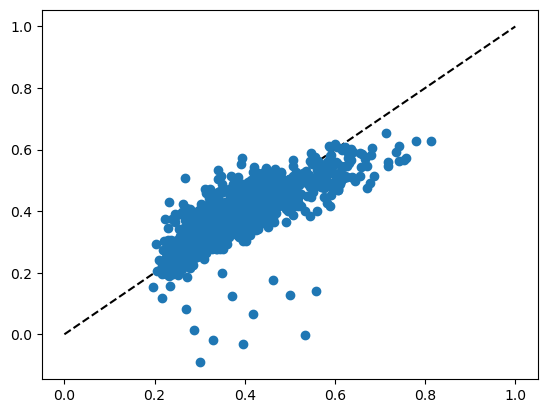

std loop:   5%|▌         | 1/20 [00:56<17:50, 56.36s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005135454653547195 0.647545671093069


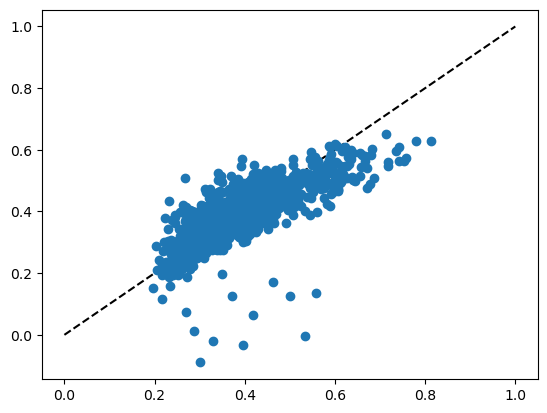

std loop:  10%|█         | 2/20 [01:50<16:31, 55.06s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005132008699570215 0.6473283790339247


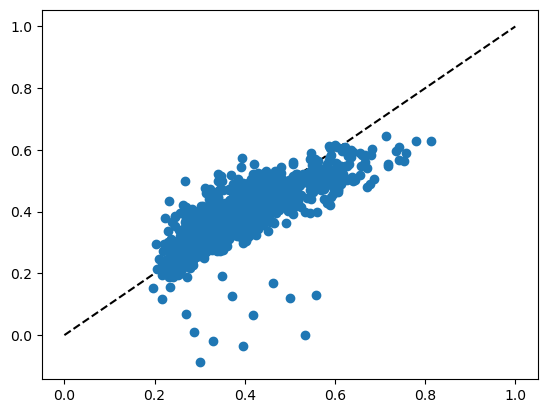

std loop:  15%|█▌        | 3/20 [02:45<15:32, 54.87s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005149995690374812 0.6484617856502193


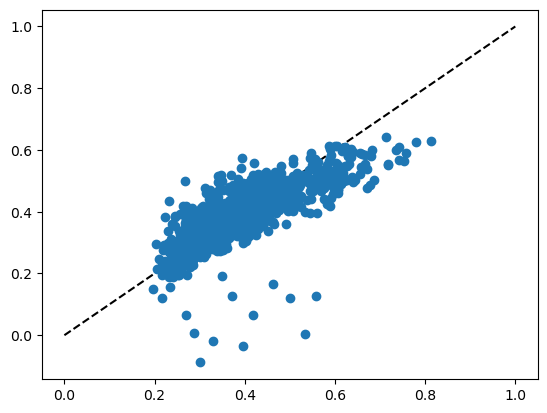

std loop:  20%|██        | 4/20 [03:44<15:03, 56.45s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005164100304494071 0.6493491698326991


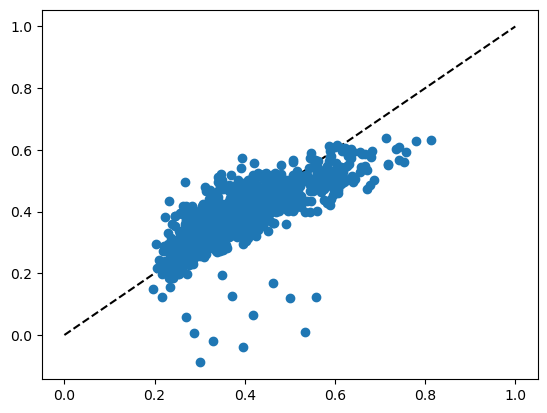

std loop:  25%|██▌       | 5/20 [04:50<15:02, 60.14s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005194916795563961 0.6512837661146292


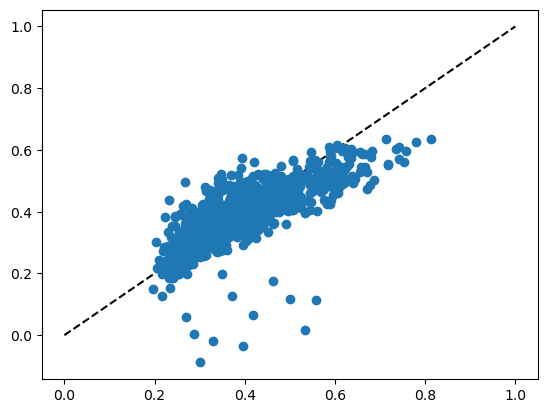

std loop:  30%|███       | 6/20 [06:09<15:33, 66.65s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005201103567341896 0.6516714667488582


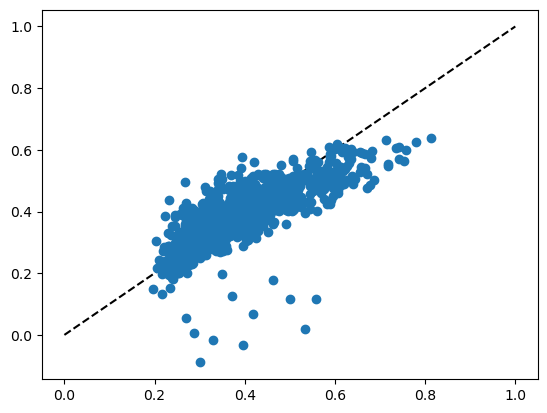

std loop:  35%|███▌      | 7/20 [07:04<13:32, 62.54s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005199745866309847 0.6515864047269554


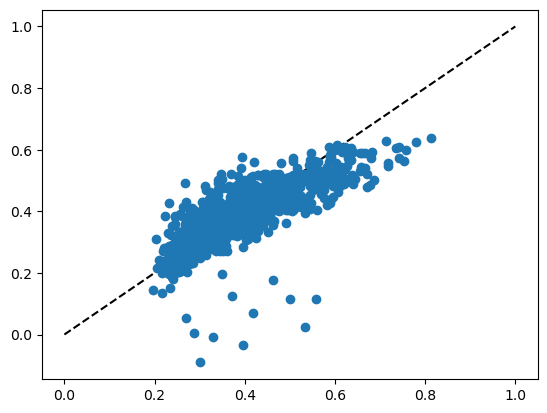

std loop:  40%|████      | 8/20 [07:58<12:00, 60.07s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005223366491719142 0.6530646922748057


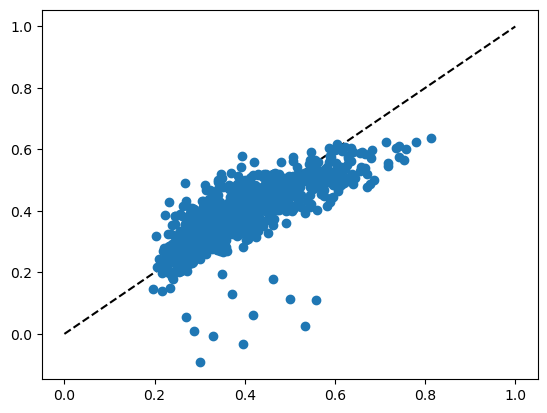

std loop:  45%|████▌     | 9/20 [08:52<10:39, 58.16s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005244045462581863 0.6543561358382801


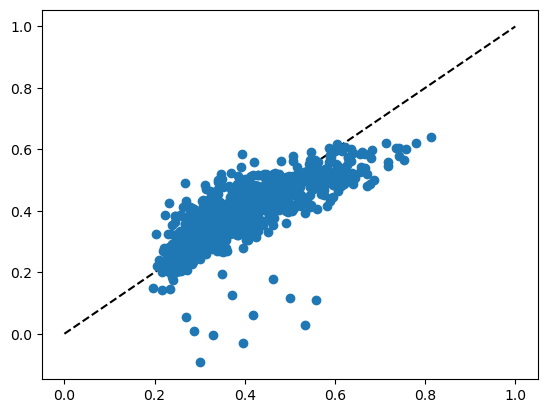

std loop:  50%|█████     | 10/20 [09:56<10:00, 60.01s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005101125014592526 0.6453776756332708


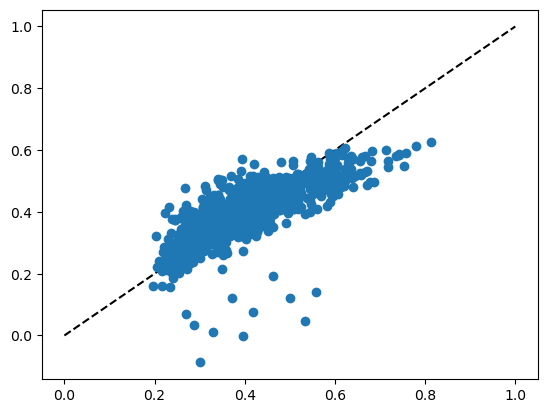

std loop:  55%|█████▌    | 11/20 [10:50<08:42, 58.04s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005107830917524504 0.6458017407789027


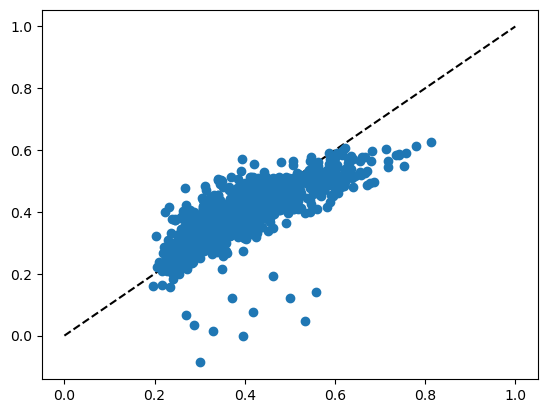

std loop:  60%|██████    | 12/20 [11:45<07:35, 56.97s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005124770670942089 0.646871731860333


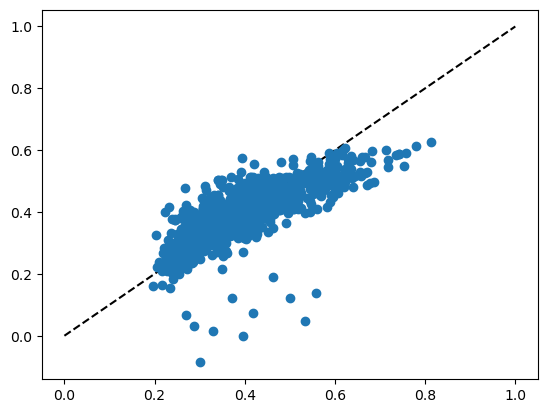

std loop:  65%|██████▌   | 13/20 [12:40<06:35, 56.43s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005141392163681267 0.6479199026424479


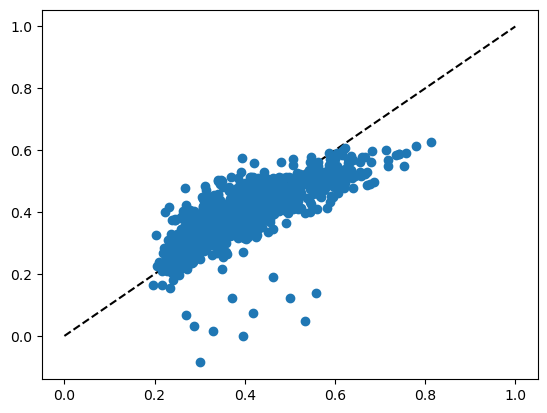

std loop:  70%|███████   | 14/20 [13:34<05:34, 55.73s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005149094600309691 0.6484050527838615


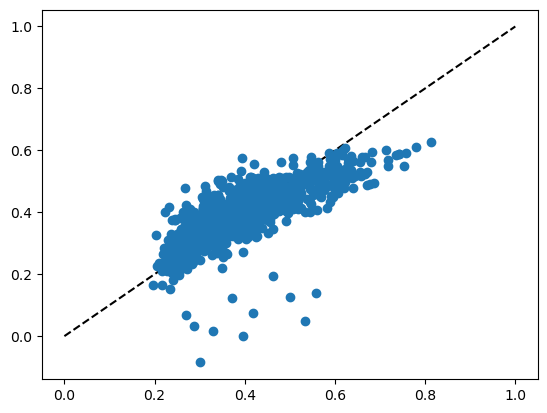

std loop:  75%|███████▌  | 15/20 [14:27<04:34, 54.85s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005162116932972625 0.649224460371278


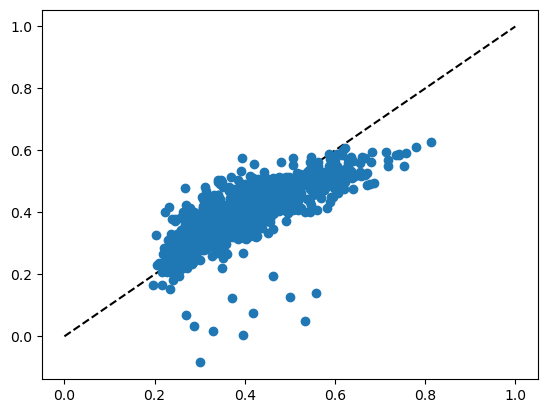

std loop:  80%|████████  | 16/20 [15:19<03:36, 54.13s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005176648296844787 0.6501376019232066


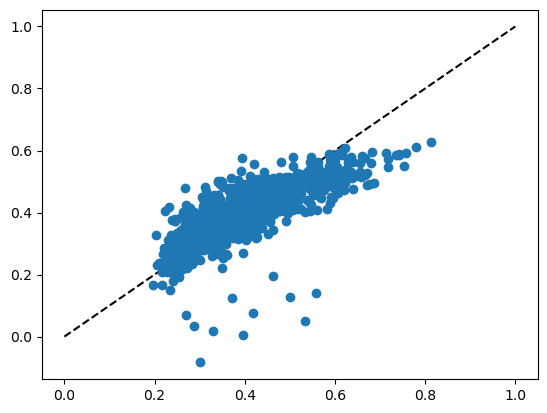

std loop:  85%|████████▌ | 17/20 [16:11<02:40, 53.61s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005185317265709021 0.6506817440704447


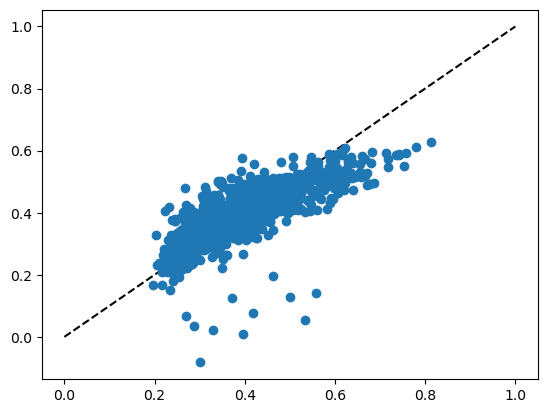

std loop:  90%|█████████ | 18/20 [17:15<01:53, 56.64s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005193710615281246 0.651208152657048


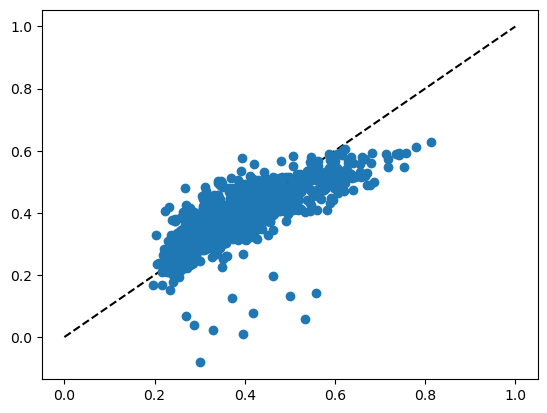

std loop:  95%|█████████▌| 19/20 [18:08<00:55, 55.35s/it]

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  40
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy training output
restarted
Seed Training: 1234
current phase: test
p1 in test & slow: 0.4999998889492148
noise_seed: 1234
noise_mean: 0.0001
noisy testing output
restarted
Spacer NRMSE:0
0.005205367695124754 0.651938548633665


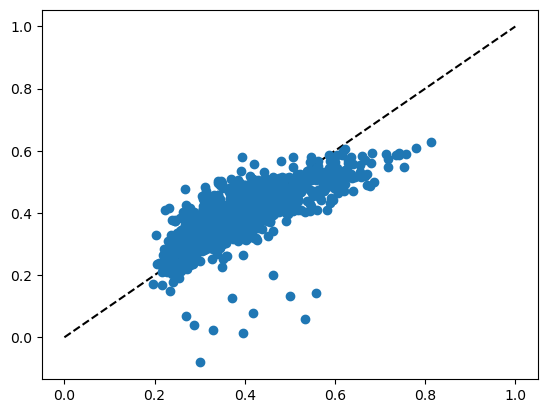

std loop: 100%|██████████| 20/20 [19:00<00:00, 57.01s/it]


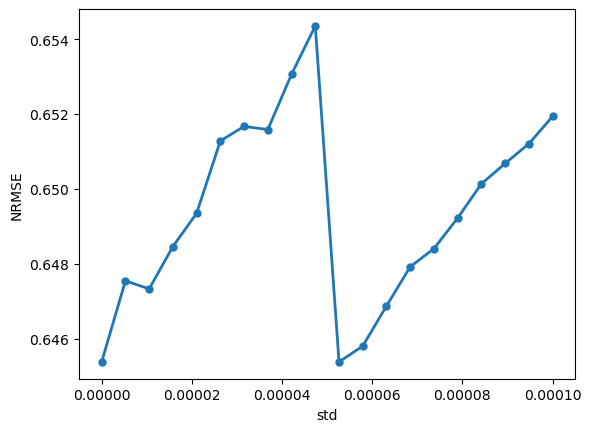

In [11]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 40
m0 = 1e-2
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 10

# Params
params = {
    'theta':1/3, 
    'gamma':.25, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)

transforms = spn.gen_signal_slow_delayed_feedback

# std loop
std_list = np.linspace(0.000,0.0001,20)

NRMSE_list_s = []

for std in tqdm(std_list,desc='std loop'):
    params['noise_std'] = std
    nrmse = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_NRMSE=True)
    NRMSE_list_s.append(nrmse)

# plot
plt.plot(std_list,NRMSE_list_s, 'o-', markersize=5, linewidth=2)    
plt.xlabel('std')
plt.ylabel('NRMSE')
plt.show()

## Exploring the discrepancy on noise across way of adding noise

1. slow; 2. fast; 3. current noise; 4. add directly normal noise


seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  1
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noise-free training output
restarted
Training data size:  2000
Training data shape:  (2000, 1)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: 0.0001
noise-free testing output
restarted
Spacer NRMSE:0
0.009077677810840552 0.8609309828291499


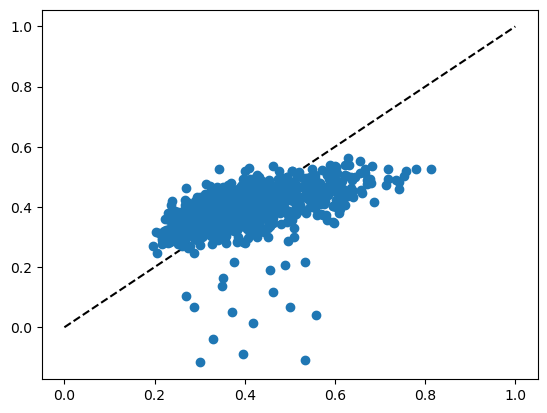

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  1
Deterministic mask will be used
1234
current phase: train
p1 in train & fast: 0.49999977789842975
noise-free training output
restarted
Training data size:  2000
Training data shape:  (2000, 1)
Seed Training: 1234
current phase: test
p1 in test & fast: 0.49999977789842975
noise-free testing output
restarted
Spacer NRMSE:0
0.009074803348121588 0.8607946643784415


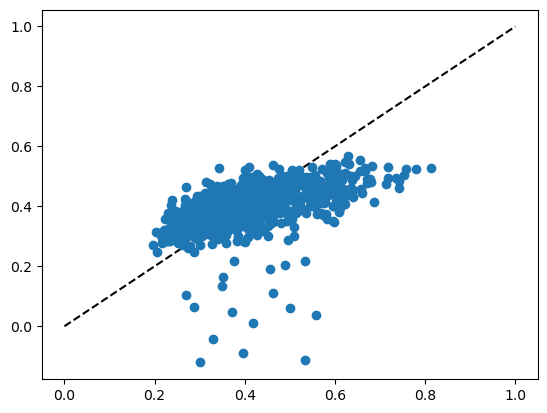

In [3]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 1
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'None',
    'noise_seed': 1234,
    'noise_mean':0.0001,
    'noise_std':0.00013,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transforms = spn.gen_signal_slow_delayed_feedback
transformf = spn.gen_signal_fast_delayed_feedback

# run
y_train_s = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transforms,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)
# run
y_train_f = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformf,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

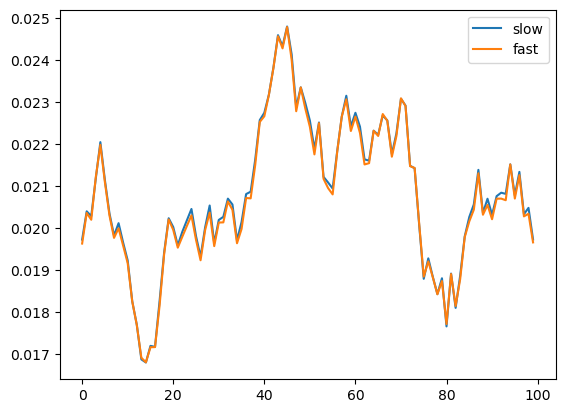

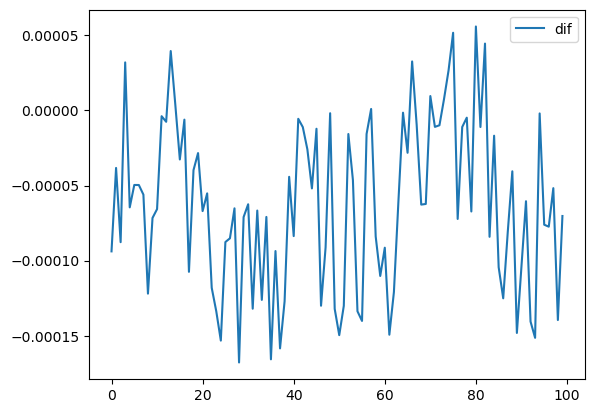

In [4]:
spac = 50
window = 100

plt.figure()
plt.plot(y_train_s[spac:spac+window],label='slow')
plt.plot(y_train_f[spac:spac+window],label='fast')
plt.legend()
plt.show()

dif = y_train_f - y_train_s
plt.figure()
plt.plot(dif[spac:spac+window],label='dif')
plt.legend()

plt.show()



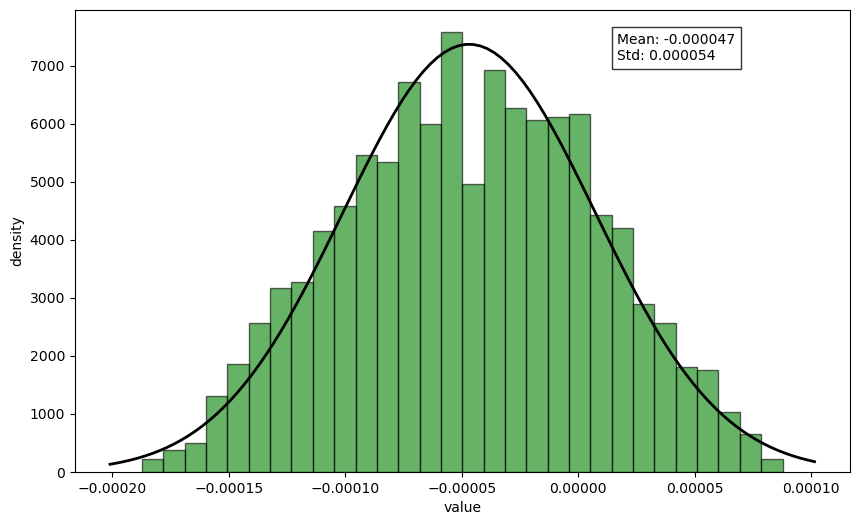

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))

count, bins, ignored = plt.hist(dif, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif) 
std_dif = np.std(dif) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()

seed NARMA: 1234
Samples for training:  2000
Samples for test:  1000
Nin = 1 , Nout =  2000 , Nvirt =  1
Deterministic mask will be used
1234
current phase: train
p1 in train & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: -4.7e-05
noisy training output
restarted
Training data size:  2000
Training data shape:  (2000, 1)
Seed Training: 1234
current phase: test
p1 in test & slow: 0.49999977789842975
noise_seed: 1234
noise_mean: -4.7e-05
noisy testing output
restarted
Spacer NRMSE:0
0.009026019442989511 0.8584778365784677


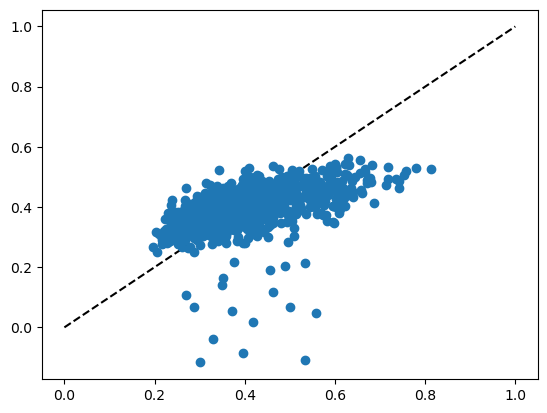

In [6]:
import spnc 
import spnc_ml as ml
import importlib
importlib.reload(spnc)
importlib.reload(ml)

# NARMA10 parameters
Ntrain = 2000
Ntest = 1000

# Net parameters
Nvirt = 1
m0 = 0.003
bias = True

# Reservoir parameters
h = 0.4
theta_H = 90
k_s_0 = 0
phi = 45
beta_prime = 20

params = {
    'theta':0.3, 
    'gamma':.113, 
    'delay_feedback':0, 
    'Nvirt':Nvirt,
    'noise_enable': 'both',
    'noise_seed': 1234,
    'noise_mean':-0.000047,
    'noise_std':0.000054,
    'train_sample': Ntrain*Nvirt,
    'test_sample': Ntest*Nvirt
}


spnn = spnc_anisotropy(h, theta_H, k_s_0, phi, beta_prime,restart = True,Primep1=None)
transformn = spnn.gen_signal_slow_delayed_feedback

# run
y_train_n = ml.spnc_narma10(Ntrain,Ntest,Nvirt,m0,bias,transformn,params,seed_NARMA=1234,fixed_mask=True,return_y_train=True)

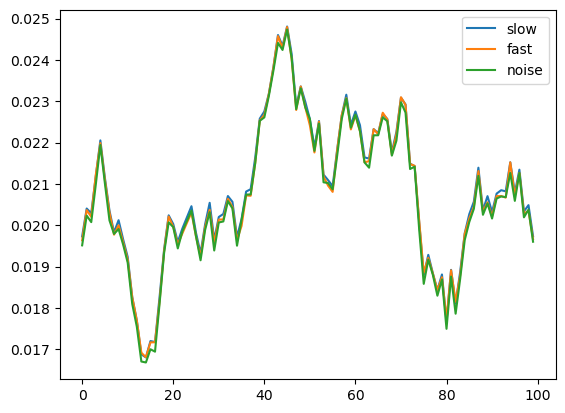

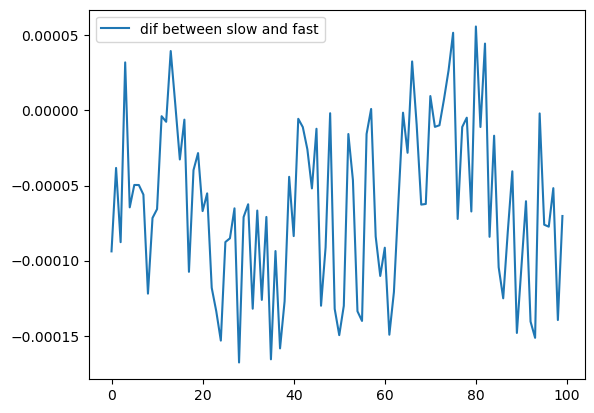

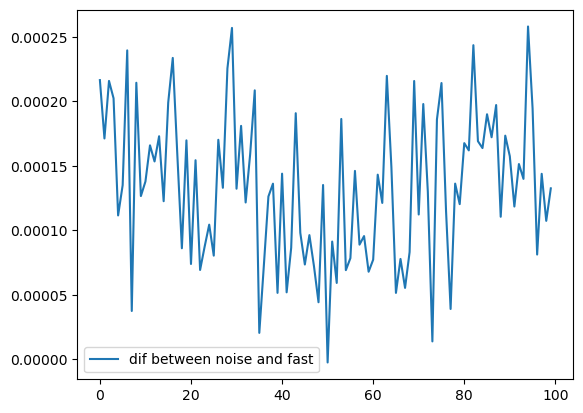

In [7]:
spac = 50
window = 100

plt.figure()
plt.plot(y_train_s[spac:spac+window],label='slow')
plt.plot(y_train_f[spac:spac+window],label='fast')
plt.plot(y_train_n[spac:spac+window],label='noise')
plt.legend()
plt.show()

dif_s_f = y_train_f - y_train_s
plt.figure()
plt.plot(dif_s_f[spac:spac+window],label='dif between slow and fast')
plt.legend()
plt.show()

dif_s_n = y_train_s - y_train_n
plt.figure()
plt.plot(dif_s_n[spac:spac+window],label='dif between noise and fast')
plt.legend()
plt.show()


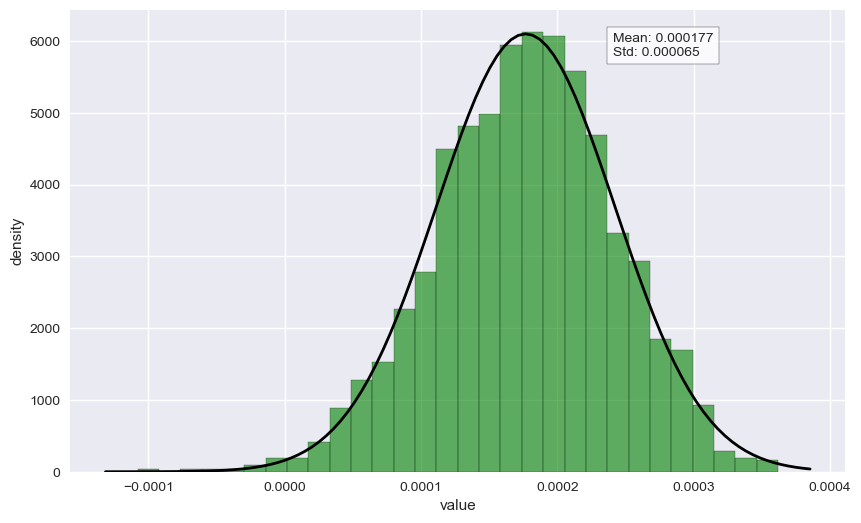

In [8]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.figure(figsize=(10, 6))

count, bins, ignored = plt.hist(dif_s_n, bins=30, density=True, alpha=0.6, color='g', edgecolor='k')

mean_dif = np.mean(dif_s_n) 
std_dif = np.std(dif_s_n) 

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean_dif, std_dif)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('value')
plt.ylabel('density')
plt.text(0.7, 0.95, f'Mean: {mean_dif:.6f}\nStd: {std_dif:.6f}', 
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8),
         verticalalignment='top')


plt.show()